<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**.**Verify the explicit form of** $r_{t}$ **given by**

$$r_t = r_0e^{-\kappa t} + \mu(1 - e^{-\kappa t}) + \sigma e^{-\kappa t}\int_{0}^{t}e^{\kappa s} dW_s$$ **is the solution to the original vasicek model**
$$
dr_t = \kappa(\mu - r_t)dt + \sigma dW_t
$$ 
<br>**Proof**
<br>
$$
\begin{align*}
&dr_t = \kappa(\mu - r_t)dt + \sigma dW_t \\
&dr_t+\kappa r_t dt=\kappa \mu dt+\sigma dW_t\\
&e^{\kappa t}dr_t+ e^{\kappa t}\kappa r_t dt=e^{\kappa t}\kappa \mu dt+e^{\kappa t}\sigma dW_t\\
&d(e^{\kappa t}r_t)=e^{\kappa t}\kappa \mu dt+e^{\kappa t}\sigma dW_t\\
&\int_0^t d(e^{\kappa t}r_t)=\mu\int_0^t \kappa e^{\kappa t}  dt +\sigma\int_0^t e^{\kappa s}dW_s \\
&e^{\kappa t}r_t-r_0=\mu(e^{\kappa t}-1)+\sigma\int_0^t e^{\kappa s}dW_s \\
&r_t = r_0e^{-\kappa t} + \mu(1 - e^{-\kappa t}) + \sigma e^{-\kappa t}\int_{0}^{t}e^{\kappa s} dW_s
\end{align*}
$$

**2.** **Design pricing engine of ZCB P(0,T) using explicit form**
$$r_t = r_0e^{-\kappa t} + \mu(1 - e^{-\kappa t}) + \sigma e^{-\kappa t}\int_{0}^{t}e^{\kappa s} dW_s$$

In [0]:
import numpy as np
import scipy.stats as ss
import scipy.optimize as so
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def zcb_explicit(T,kappa,sigma,mu,r0):
  B=(1-np.exp(-kappa*(T)))/kappa
  A=(mu-sigma**2/(2*kappa**2))*(B-T)-sigma**2/(4*kappa)*(B**2)
  return np.exp(A-B*r0)

**3.** **Design alternative pricing engine of ZCB P(0,T) using exact sampling**

In [0]:
def zcb_exactsampling(T,kappa,mu,sigma,r0,n):
  mu=(mu*T)+((r0-mu)*(1-np.exp(-kappa*T))/kappa)
  var=((sigma**2)/(2*(kappa**3)))*((2*kappa*T)-3+(4*np.exp(-kappa*T))-np.exp(-2*kappa*T))
  r= np.random.normal(mu,var,n)
  r_=np.exp(-r)
  return np.mean(r_)

**4.** **Compute ZCB P(0,1) Libor L(0,1) with the following parameters using above two different pricing engines.**

In [0]:
theta=[0.1,0.05,0.003,0.03]
kappa,mu,sigma,r0=theta
T=1
n=100

In [7]:
P_explicit=zcb_explicit(T,kappa,sigma,mu,r0)
print('ZCB P(0,1) price using explicit form is '+ str(P_explicit))
P_exactsampling=zcb_exactsampling(T,kappa,mu,sigma,r0,n)
print('ZCB P(0,1) price using exact sampling is '+ str(P_exactsampling))

ZCB P(0,1) price using explicit form is 0.9695084475425054
ZCB P(0,1) price using exact sampling is 0.9695070194401448


In [0]:
def Libor(T,P):
  return 100/T*(1/P-1)
  

In [9]:
L_explicit=Libor(T,P_explicit)
print('ZCB L(0,1) price using explicit form is '+ str(L_explicit))
L_exactsampling=Libor(T,P_exactsampling)
print('ZCB L(0,1) price using exact sampling is '+ str(L_exactsampling))

ZCB L(0,1) price using explicit form is 3.145052787810565
ZCB L(0,1) price using exact sampling is 3.1452047224437507


**5.** **Find 10 term swap rates with term length 1/2 year** 

In [0]:
P1=[]
P2=[]
def Swap(T,N,kappa,sigma,mu,r0):
  delta=T/N
  for j in range(N):
    P1.append(zcb_explicit((j+1)*delta,kappa,sigma,mu,r0)) # using explicit form
    P2.append(zcb_exactsampling((j+1)*delta,kappa,mu,sigma,r0,n)) # using exact sampling
  S1=100*(1-zcb_explicit(T,kappa,sigma,mu,r0))/(delta*sum(P1))
  S2=100*(1-zcb_exactsampling(T,kappa,mu,sigma,r0,n))/(delta*sum(P2))
  return S1,S2  

In [11]:
S1,S2=Swap(5,10,kappa,sigma,mu,r0)
print('10 term swap rates with term length 1/2 year using explicit form is '+ str(S1))
print('10 term swap rates with term length 1/2 year using exact sampling is '+ str(S2))


10 term swap rates with term length 1/2 year using explicit form is 3.441821396389877
10 term swap rates with term length 1/2 year using exact sampling is 3.4446715222424995


 **6.** **Pick a date, and using Libor market data of that data, calibrate Vasicek model. Then compare market rate and calibrated rate in a plot**

In [0]:
dfLiborRate = pd.DataFrame({'maturity (months)': [1, 2, 3, 6, 12],
                           '20081029 rate(%)': [3.1175, 3.2738, 3.4200, 3.4275, 3.4213],
                           '20110214 rate(%)': [0.2647, 0.2890, 0.3140, 0.4657, 0.7975]
                           })

libor_2008_10_29 = [3.1175, 3.2738, 3.4200, 3.4275, 3.4213]
libor_2011_02_14 = [0.2647, 0.2890, 0.3140, 0.4657, 0.7975]
libor_maturities = [1/12, 2/12, 3/12, 6/12, 12/12]

In [0]:
def err_function(x,libor_2008_10_29,libor_maturities):
  kappa,mu,sigma,r0=x
  P1=[]
  for T in libor_maturities:
    P1.append(zcb_explicit(T,kappa,sigma,mu,r0))
  P1=np.array(P1)
  return sum((P1-libor_2008_10_29)**2)

In [14]:
x=np.array([kappa,mu,sigma,r0])
err_function(x, libor_2008_10_29,libor_maturities)

27.55805596080814

In [0]:
def calibration(libor_maturities,libor_2008_10_29):
  init_guess=np.array([0.1, 0.05, 0.003, 0.03])
  return so.fmin(err_function, init_guess, args =(libor_2008_10_29,libor_maturities), disp =0)

In [0]:
kappa_cali,mu_cali,sigma_cali,r_cali=calibration(libor_maturities,libor_2008_10_29)
x_cali=[]
for T in libor_maturities:
  x_cali.append(zcb_exactsampling(T,kappa_cali,mu_cali,sigma_cali,r_cali,n))

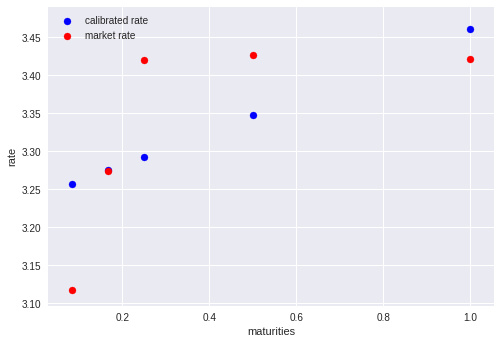

In [17]:
plt.scatter(libor_maturities,x_cali,color='b',label='calibrated rate')
plt.scatter(libor_maturities,libor_2008_10_29,color='r',label='market rate')
plt.legend()
plt.xlabel('maturities')
plt.ylabel('rate')
plt.show()


**7.Pick a date, and using Swap market data of that data, calibrate Vasicek model. Then compare market rate and calibrated rate in a plot**

In [0]:
dfSwapRate = pd.DataFrame({'term (year)': [2, 3, 5, 7, 10, 15, 30],
                          '20081029 rate(%)': [2.6967, 3.1557, 3.8111, 4.1497, 4.3638, 4.3753, 4.2772],
                          '20110214 rate(%)': [1.0481, 1.5577, 2.5569, 3.1850, 3.7225, 4.1683, 4.4407]
                          })

swap_2008_10_29 = [2.6967, 3.1557, 3.8111, 4.1497, 4.3638, 4.3753, 4.2772]
swap_2011_02_14 = [1.0481, 1.5577, 2.5569, 3.1850, 3.7225, 4.1683, 4.4407]
swap_maturities = [2, 3, 5, 7, 10, 15, 30]
swap_terms = [4, 6, 10, 14, 20, 30, 60]

In [0]:
def err1_function(x,swap_terms,swap_2008_10_29):
  kappa,mu,sigma,r0=x
  s=[]
  for N in swap_terms:
    s.append(Swap(N/2,N,kappa,sigma,mu,r0)[0])
  s=np.array(s)
  return sum((s-swap_2008_10_29)**2)
 

In [34]:
err1_function(x,swap_terms,swap_2008_10_29)


105.45556705000001

In [0]:
def calibration1(swap_terms,swap_2008_10_29):
  init_guess=np.array([.1, .05, .003, .03])
  return so.fmin(err1_function, init_guess, args = (swap_terms,swap_2008_10_29), disp = 0)

In [0]:
kappa_cali,mu_cali,sigma_cali,r_cali=calibration1(swap_terms,swap_2008_10_29)

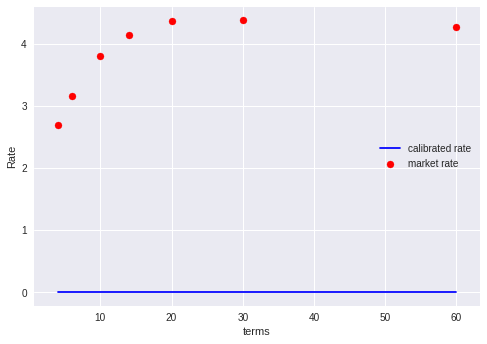

In [37]:
x_swap_cali=[]
for N in swap_terms:
  x_swap_cali.append(Swap(N/2,N,kappa_cali,mu_cali,sigma_cali,r_cali)[0])
plt.plot(swap_terms,x_swap_cali,color='b',label='calibrated rate') 
plt.scatter(swap_terms,swap_2008_10_29,color='r',label='market rate')
plt.legend()
plt.xlabel('terms')
plt.ylabel('Rate')
plt.show()